# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [23]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import panel as pn
from panel.interact import interact

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [24]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



### Question: why dont my numbers match

In [25]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
tot_housing = sfo_data.groupby(['year'])['housing_units'].mean()
tot_housing_min = sfo_data.groupby(['year'])['housing_units'].min()
tot_housing_max = sfo_data.groupby(['year'])['housing_units'].max()
tot_housing_std = sfo_data.groupby(['year'])['housing_units'].std()
# print (f'Total housing years per year: \n  {sfo_data.groupby(['year'])['housing_units'].sum()}')  # why doesnt this work?
# sfo_data.groupby('year')['housing_units'].sum()
print (f'Total housing years per year: \n  {tot_housing}') 
print (f'Minimum housing years per year: \n  {tot_housing_min}') 
print (f'Maximum housing years per year: \n  {tot_housing_max}') 
print (f'Std housing years per year: \n  {tot_housing_std}') 

Total housing years per year: 
  year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64
Minimum housing years per year: 
  year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64
Maximum housing years per year: 
  year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64
Std housing years per year: 
  year
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
Name: housing_units, dtype: float64


In [26]:
# Save the dataframe as a csv file
# YOUR CODE HERE!
sfo_house_units = pd.DataFrame(sfo_data.groupby('year')['housing_units'].mean())
# sfo_house_units.


### Why is 2016 lower in my chart
### do I use Pandas plot or mathplot
### how do I set unit for y axis.

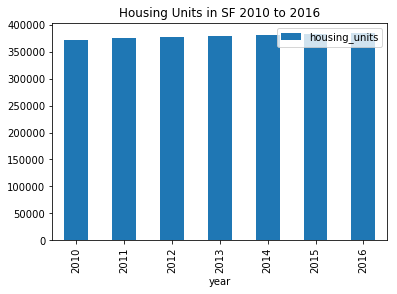

In [27]:
ax = sfo_house_units.plot.bar(title = "Housing Units in SF 2010 to 2016")
ax.set_ylabel = ('Housing Units')


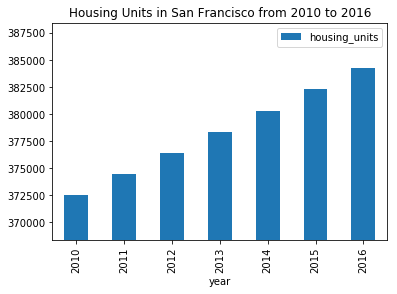

In [28]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!
# fig, ax1 = plt.subplots()

# sfo_house_units.plot.bar(title = "Housing Units in San Francisco from 2010 to 2016",  ylim = (0.95 * tot_housing.min(), 1.05 * tot_housing.max() ))
sfo_house_units.plot.bar(title = "Housing Units in San Francisco from 2010 to 2016",  ylim = (tot_housing.min() - tot_housing.std(), tot_housing.max() + tot_housing.std()))


# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

(353932.0, 403454.10000000003)

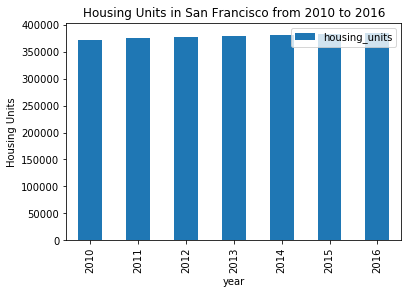

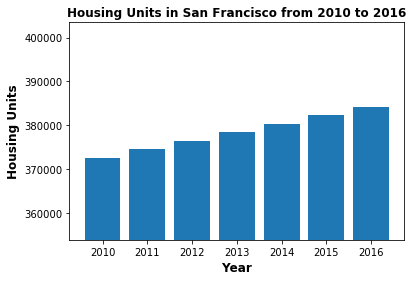

In [9]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!

ax1 = sfo_house_units.plot.bar(title = "Housing Units in San Francisco from 2010 to 2016")
ax1.set_ylabel('Housing Units')

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!
# tot_housing.max()
fig2, ax2 = plt.subplots()
# fig, ax = plt()
ax2.bar(sfo_house_units.index, sfo_house_units['housing_units'])
ax2.set_ylabel('Housing Units', fontweight="bold", fontsize = 12)
ax2.set_xlabel('Year',  fontweight="bold", fontsize = 12)
ax2.set_title('Housing Units in San Francisco from 2010 to 2016',fontweight="bold", fontsize = 12 )
ax2.set_ylim (bottom = 0.95 * tot_housing.min(), top =  1.05 * tot_housing.max())

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [7]:
# delete
# Calculate the average sale price per square foot and average gross rent
# YOUR CODE HERE!

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [10]:
# Calculate the average sale price per square foot and average gross rent
# YOUR CODE HERE!
# sfo_data.groupby('year')['sale_price_sqr_foot'].mean()
# sfo_data.groupby('year')['gross_rent'].mean()
sfo_house_units['sale_price_sqr_foot'] = sfo_data.groupby('year')['sale_price_sqr_foot'].mean()
sfo_house_units ['gross_rent'] = sfo_data.groupby('year')['gross_rent'].mean()

sfo_house_units[['sale_price_sqr_foot', 'gross_rent']]

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


Text(0.5, 1.0, 'Average Gross Rent by Year')

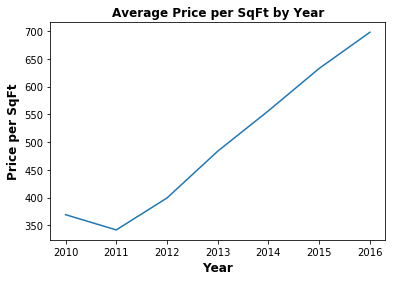

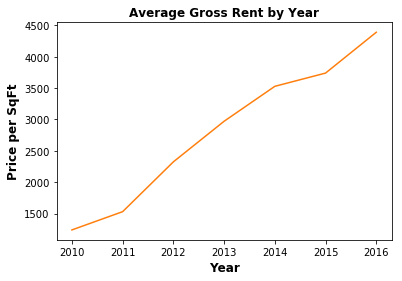

In [11]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
# YOUR CODE HERE!
fig1, ax1 = plt.subplots()
# ax1 =  sfo_house_units.plot.()
ax1.plot(sfo_house_units.index, sfo_house_units['sale_price_sqr_foot'], color='tab:blue')
ax1.set_ylabel('Price per SqFt', fontweight="bold", fontsize = 12)
ax1.set_xlabel('Year',  fontweight="bold", fontsize = 12)
ax1.set_title('Average Price per SqFt by Year',fontweight="bold", fontsize = 12 )
# ax1.set_color()
# ax1.set_ylim (bottom = 0.95 * tot_housing.min(), top =  1.05 * tot_housing.max())

# Line chart for average montly rent
# YOUR CODE HERE!
fig1, ax2 = plt.subplots()
# ax1 =  sfo_house_units.plot.()
ax2.plot(sfo_house_units.index, sfo_house_units['gross_rent'],color='tab:orange' )
ax2.set_ylabel('Price per SqFt', fontweight="bold", fontsize = 12)
ax2.set_xlabel('Year',  fontweight="bold", fontsize = 12)
ax2.set_title('Average Gross Rent by Year',fontweight="bold", fontsize = 12 )

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [9]:
# delete
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [12]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_neighb = pd.DataFrame(columns = ['sale_price_sqr_foot', 'housing_units', 'gross_rent'])
sfo_neighb['sale_price_sqr_foot'] = sfo_data.groupby(['year','neighborhood' ])['sale_price_sqr_foot'].mean()
sfo_neighb ['gross_rent'] = sfo_data.groupby(['year','neighborhood' ])['gross_rent'].mean()
sfo_neighb ['housing_units'] = sfo_data.groupby(['year','neighborhood' ])['housing_units'].mean()
sfo_neighb.reset_index(inplace = True)
sfo_neighb.head(5)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [10]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [13]:
neighborhoods = sfo_neighb['neighborhood'].unique()

In [14]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

#  Define function to plot price per sq ft
# iniitially work with global dataframe named sfo_neighb
def plot_house_sqft (neighborhood):

    #create a new data frame wwith tiems to be odne
    disp_df = pd.DataFrame()
    disp_df['years'] = sfo_neighb.loc[sfo_neighb['neighborhood'] == neighborhood, 'year']
    disp_df['sale_price_sqr_foot'] = sfo_neighb.loc[sfo_neighb['neighborhood'] == neighborhood, 'sale_price_sqr_foot']
    
    return disp_df.hvplot.line(
        x = 'years',
        y = 'sale_price_sqr_foot',
        title = (f'Neighborhood:  {neighborhood}'),
#         color  = 'years',
#         colormap="viridis",
#         title="SF Price per square foot",
    )
    

## how to move it to right?

In [15]:
# Render plot with Paplot_house_sqftnel interactive widget
interact(plot_house_sqft, neighborhood=neighborhoods, position = 'right' )

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive01461')

### create function to take in dataframe and neighbour hood

In [16]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
def sfo_gross_rent (neighborhood):

    #create a new data frame wwith tiems to be odne
    disp_df = pd.DataFrame()
    disp_df['years'] = sfo_neighb.loc[sfo_neighb['neighborhood'] == neighborhood, 'year']
    disp_df['gross_rent'] = sfo_neighb.loc[sfo_neighb['neighborhood'] == neighborhood, 'gross_rent']
    
    return disp_df.hvplot.line(
        x = 'years',
        y = 'gross_rent',
        
#         color  = 'years',
#         colormap="viridis",
#         title="SF Price per square foot",
        title = (f'Neighborhood:  {neighborhood}')
    )
    

In [17]:
interact(sfo_gross_rent, neighborhood=neighborhoods, position = 'right' )

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive01644')

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [12]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


### is this sq ft and which year??
### is index necessary?

In [18]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!
# sfo_neighb.groupby('neighborhood')['sale_price_sqr_foot'].mean()
sfo_avg_df = pd.DataFrame()
sfo_avg_df ['sale_price_sqr_foot'] = sfo_neighb.groupby('neighborhood')['sale_price_sqr_foot'].mean()
sfo_avg_df ['housing_units'] = sfo_neighb.groupby('neighborhood')['housing_units'].mean()
sfo_avg_df ['gross_rent'] = sfo_neighb.groupby('neighborhood')['gross_rent'].mean()
sf_topten_df = sfo_avg_df.nlargest(10,'gross_rent' )
sf_topten_df.sort_values(by = 'sale_price_sqr_foot', inplace = True)
sf_topten_df

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Silver Terrace,170.292549,380348.00,3528.000000
Visitacion Valley,301.466180,381321.50,3657.000000
Anza Vista,373.382198,379050.00,3031.833333
Excelsior,388.765927,379050.00,3031.833333
Inner Parkside,519.385604,379861.25,3224.000000
Mission Terrace,523.466201,379569.20,3173.400000
Bernal Heights,576.746488,379374.50,3080.333333
Bayview Heights,590.792839,382295.00,3739.000000
Westwood Park,687.087575,382295.00,3959.000000


In [21]:
# debug cell to delete
print(sf_topten_df.head())

                   sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                      
Silver Terrace              170.292549      380348.00  3528.000000
Visitacion Valley           301.466180      381321.50  3657.000000
Anza Vista                  373.382198      379050.00  3031.833333
Excelsior                   388.765927      379050.00  3031.833333
Inner Parkside              519.385604      379861.25  3224.000000


In [19]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
sf_topten_df.hvplot.bar(
        x = 'neighborhood',
        y = 'sale_price_sqr_foot',
        
#         color  = 'years',
#         colormap="viridis",
#         title="SF Price per square foot",
        title = ('Top 10 Most Expensive Neighborhoods'),
        rot = 90
    )

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [401]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_neighb.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [402]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
test_df = pd.DataFrame()
test_df['gross_rent'] = sfo_neighb.groupby(['year', 'neighborhood'])['gross_rent'].mean()
test_df['sale_price_sqr_foot']= sfo_neighb.groupby(['year', 'neighborhood'])['sale_price_sqr_foot'].mean()
test_df.reset_index(inplace=True)
test_df.sample(5)

,year,neighborhood,gross_rent,sale_price_sqr_foot
347,2015,Van Ness/ Civic Center,3739,677.838232
127,2012,Croker Amazon,2324,415.090340
85,2011,Lake --The Presidio,1530,330.108894
176,2013,Alamo Square,2971,387.794144
267,2014,Noe Valley,3528,654.801500


In [385]:
# Plotting the data from the top 10 expensive neighborhoods
# # YOUR CODE HERE!
def sf_rent_vs_cost (Neighbourhood):
#     print (Neighbourhood)
    disp_df = pd.DataFrame()
#     print (test_df.loc[test_df['neighborhood'] == 'Sunnyside', 'year'])
    disp_df['years'] = test_df.loc[test_df['neighborhood'] == Neighbourhood, 'year']
#     print (Neighbourhood)
    disp_df['gross_rent'] = test_df.loc[test_df['neighborhood'] == Neighbourhood, 'gross_rent']
    disp_df['sale_price_sqr_foot'] = test_df.loc[test_df['neighborhood'] == Neighbourhood, 'sale_price_sqr_foot']


    return(disp_df.hvplot.bar(
        x = 'years',
        y = ['gross_rent', 'sale_price_sqr_foot' ],
        value_label = "Price",
        rot = 90,
        title = (f'Top 10 Expensive Neighborhoods: {Neighbourhood}'))
    )
  


In [403]:
interact(sf_rent_vs_cost, Neighbourhood=neighborhoods )

Column
    [0] Column
        [0] Select(name='Neighbourhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Bars, name='interactive14529')

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [16]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [404]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!

# Read the census data into a Pandas DataFrame
coord_path = Path("Data/neighborhoods_coordinates.csv")
coord_data = pd.read_csv(coord_path)
coord_data.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [17]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [405]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
sfo_avg_df.head(5)

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


In [396]:
# sfo_avg_df.reset_index(inplace = True)
# sfo_avg_df.head(5)

,index,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,0,Alamo Square,366.020712,378401.0,2817.285714
1,1,Anza Vista,373.382198,379050.0,3031.833333
2,2,Bayview,204.588623,376454.0,2318.400000
3,3,Bayview Heights,590.792839,382295.0,3739.000000
4,4,Bernal Heights,576.746488,379374.5,3080.333333


In [18]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


In [406]:
# Join the average values with the neighborhood locations
sf_joint_df = coord_data.join(sfo_avg_df, on = 'Neighborhood',   how = 'inner')
sf_joint_df.head(5)

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
5,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [22]:
# Set the mapbox access token
# YOUR CODE HERE!
# Read the Mapbox API key
load_dotenv('test1.env')
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)
map=px.scatter_mapbox(
    sf_joint_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title = "Average Sale Price Per Square Foot and Gross Rent in San Francisco",
    zoom=4)
# Display the 
map.show()

NameError: name 'sf_joint_df' is not defined

In [412]:
# delete
# # Set the mapbox access token
# # YOUR CODE HERE!
# # Read the Mapbox API key
# load_dotenv('test1.env')
# map_box_api = os.getenv("mapbox")
# map_box_api
# # # Set the Mapbox API
# # px.set_mapbox_access_token(map_box_api)
# # map=px.scatter_mapbox(
# #     sf_joint_df,
#     lat="Lat",
# #     lon="Lon",
# #     size="sale_price_sqr_foot",
# #     color="Neighborhood",
# #     zoom=4)
# # # Display the 
# # map.show()

In [ ]:
# delete
# Set the mapbox access token
# YOUR CODE HERE!

# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

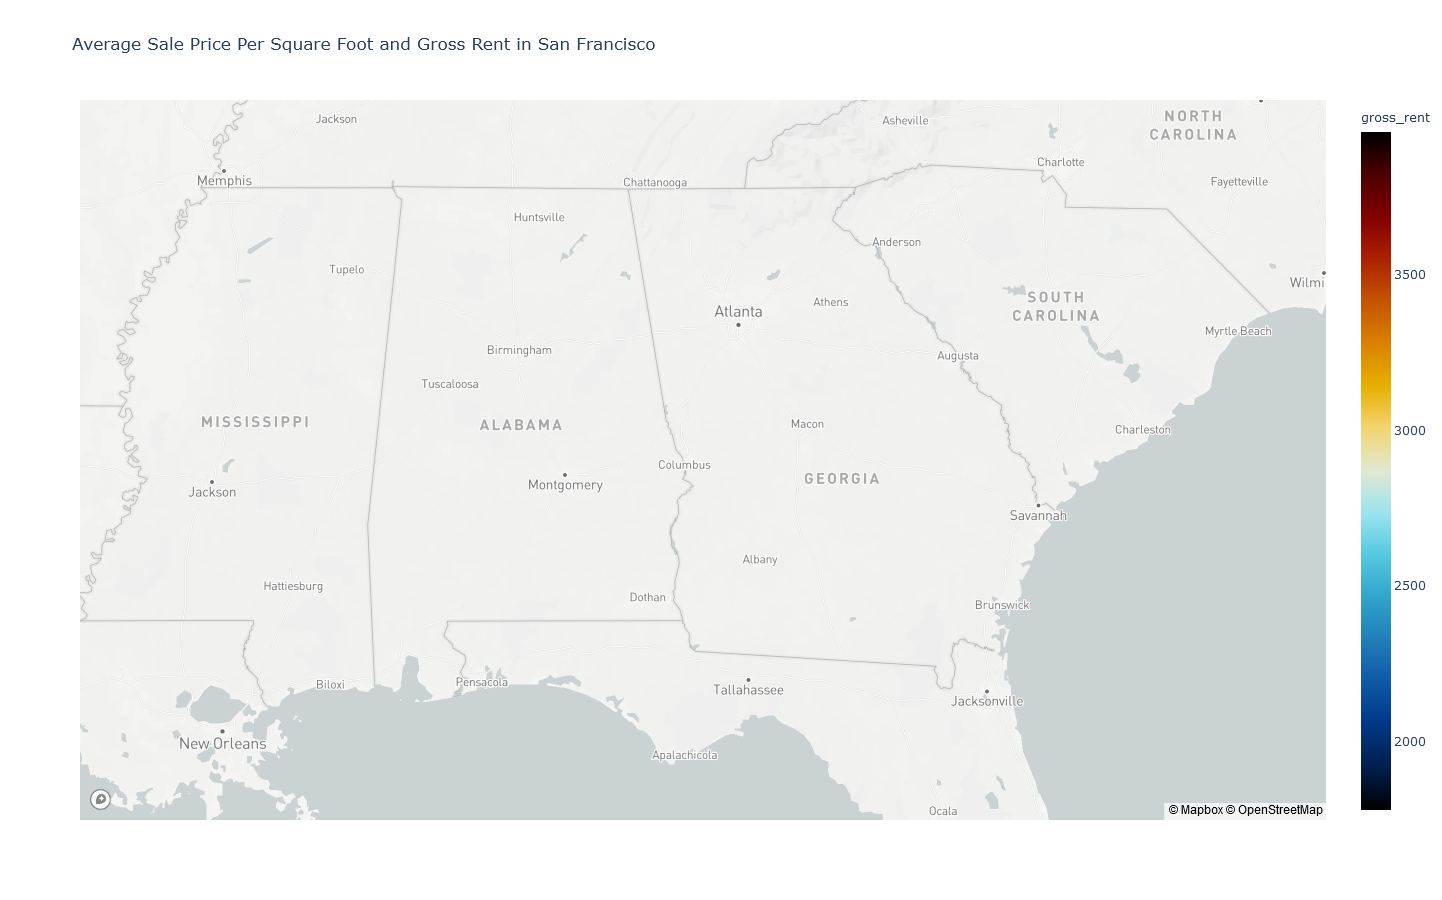

In [19]:
# delete
# # Set the mapbox access token
# # YOUR CODE HERE!
# # Read the Mapbox API key
# load_dotenv('test1.env')
# map_box_api = os.getenv("mapbox")

# # Set the Mapbox API
# px.set_mapbox_access_token(map_box_api)
# map=px.scatter_mapbox(
#     sf_joint_df,
#     lat="Latitude",
#     lon="Longitude",
#     size="PopulationCount",
#     color="CityName",
#     zoom=4)
# # Display the 
# map.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


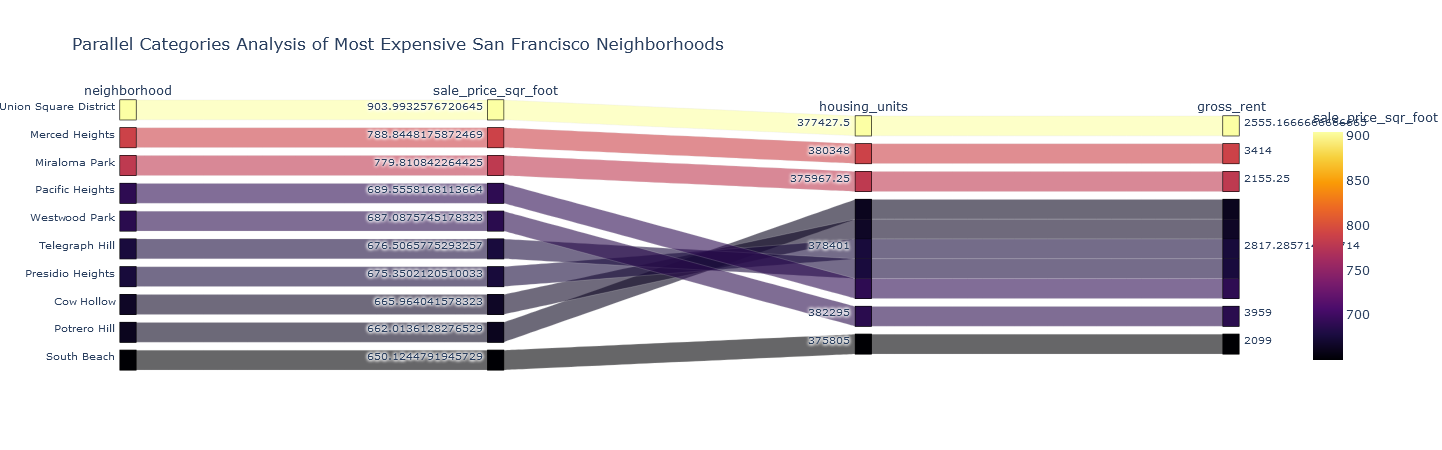

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

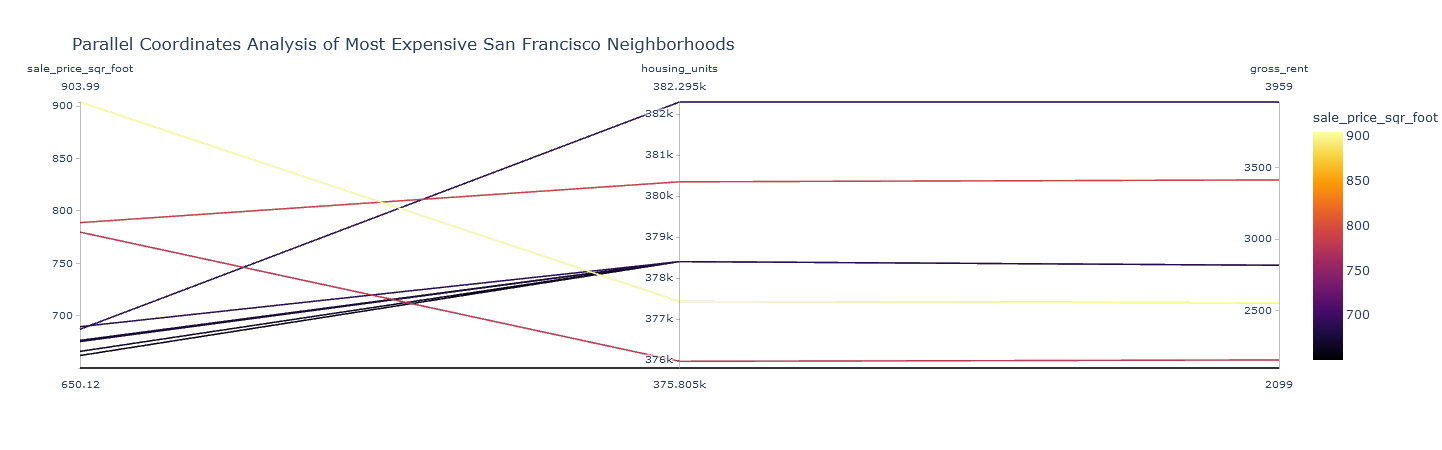

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

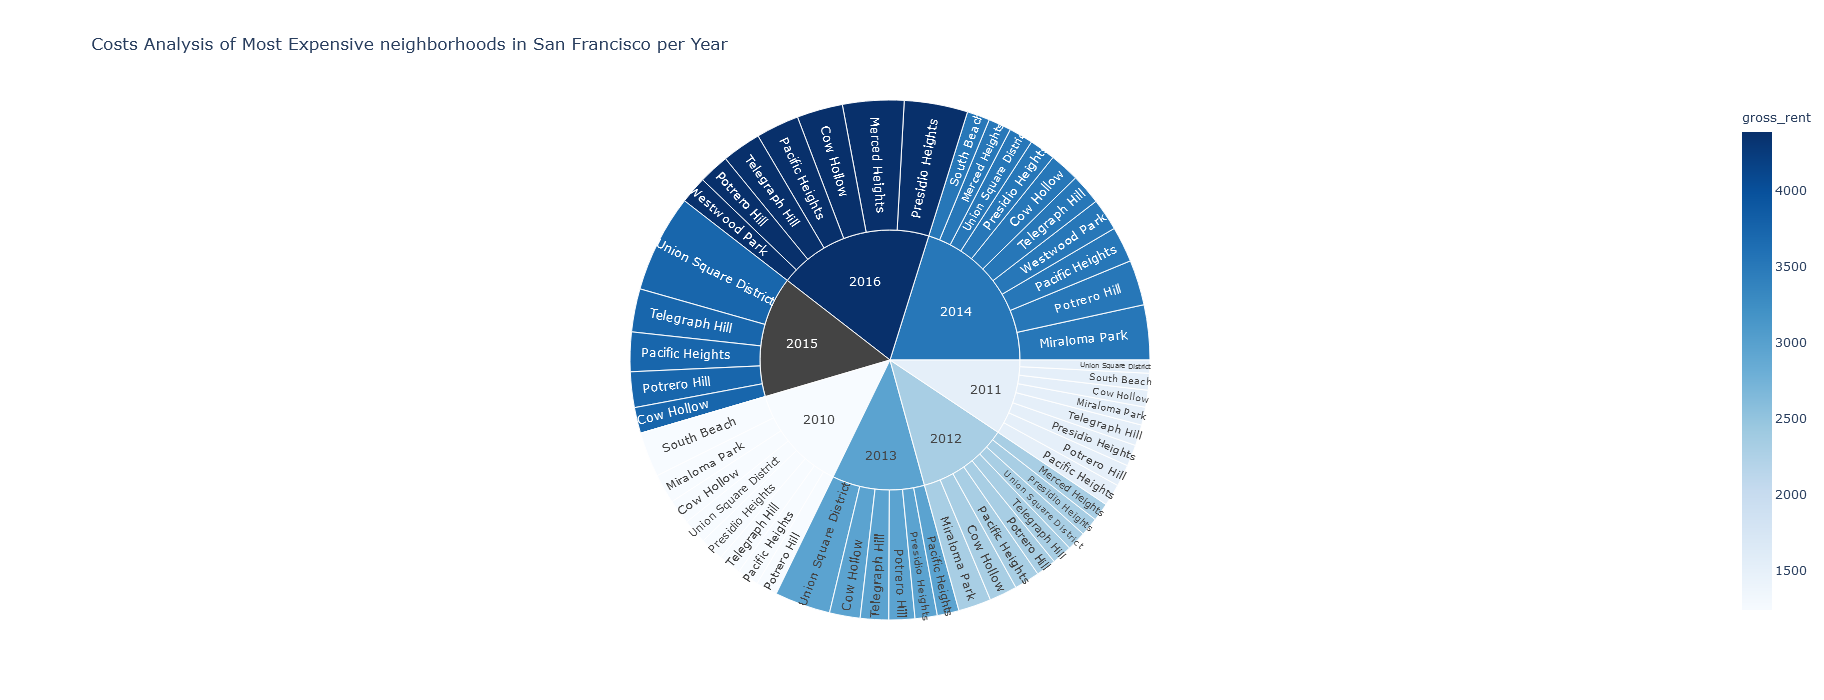

In [23]:
# Sunburst Plot
# YOUR CODE HERE!